# QCA Dataset pipeline

## Step 1: Create a set of molecules to study, here is an example set of biaryls.

Simon Boothroyd's constructure is a great tool to easily build molecules off scaffolds, https://github.com/SimonBoothroyd/constructure.

Preset Scaffolds: https://github.com/SimonBoothroyd/constructure/blob/main/docs/scaffolds.png \
Preset Substituents: https://github.com/SimonBoothroyd/constructure/blob/main/docs/substituents.png

In [3]:
# Import the scaffold object which stores the scaffold definition.
from constructure.scaffolds import Scaffold

# Create the biaryl scaffold with aryl.
# R1 and R2 are filled with the r_groups dict values

scaffold_with_aryl = Scaffold(
    smiles="c1cc([R1])ccc1-c2ccc([R2])cc2",
    r_groups={
        1: ["hydrogen", "alkyl", "aryl", "halogen", "hetero", "acyl"],
        2: ["hydrogen", "alkyl", "aryl", "halogen", "hetero", "acyl"],
    },
)

# Create the biaryl scaffold with pyridyl.
scaffold_with_pyridyl = Scaffold(
    smiles="c1cc([R1])ccc1-c2ccnc([R2])c2",
    r_groups={
        1: ["hydrogen", "alkyl", "aryl", "halogen", "hetero", "acyl"],
        2: ["hydrogen", "alkyl", "aryl", "halogen", "hetero", "acyl"],
    },
)

# Create the biaryl scaffold with pyrrole.
scaffold_with_pyrrole = Scaffold(
    smiles="c1cc([R1])ccc1-c2cn([R2])cc2",
    r_groups={
        1: ["hydrogen", "alkyl", "aryl", "halogen", "hetero", "acyl"],
        2: ["hydrogen", "alkyl", "aryl", "halogen", "hetero", "acyl"],
    },
)

# Create the biaryl scaffold with pyrimidimine.
scaffold_with_pyrimidine = Scaffold(
    smiles="c1cc([R1])ccc1-c2cnc([R2])nc2",
    r_groups={
        1: ["hydrogen", "alkyl", "aryl", "halogen", "hetero", "acyl"],
        2: ["hydrogen", "alkyl", "aryl", "halogen", "hetero", "acyl"],
    },
)

In [5]:
from constructure.constructors import RDKitConstructor as Constructor
from constructure.substituents import SUBSTITUENTS

substituents={1: ["[R][S-]", "[R][O-]","[R][H]"],
              2: ["[R]S(=O)(=O)N", "[R][N+](C)(C)(C)", SUBSTITUENTS['nitro'], "[R][N+](#N)","[R][H]"],
             }
              
#1
smiles_with_aryl = Constructor.enumerate_combinations(
    scaffold_with_aryl,
    substituents=substituents,
    validate=False,
    
)

#2
smiles_with_pyridyl = Constructor.enumerate_combinations(
    scaffold_with_pyridyl,
    substituents=substituents,
    validate=False,
)


#3
smiles_with_pyrrole = Constructor.enumerate_combinations(
    scaffold_with_pyrrole,
    substituents=substituents,
    validate=False,
)

#4
smiles_with_pyrimidine = Constructor.enumerate_combinations(
    scaffold_with_pyrimidine,
    substituents=substituents,
    validate=False,
)

In [6]:
smiles =  smiles_with_aryl + smiles_with_pyridyl + smiles_with_pyrrole + \
          smiles_with_pyrimidine
print(len(smiles))

60


### Visualizing the inputs

In [12]:
from rdkit.Chem import Draw
from rdkit.Chem import MolFromSmiles

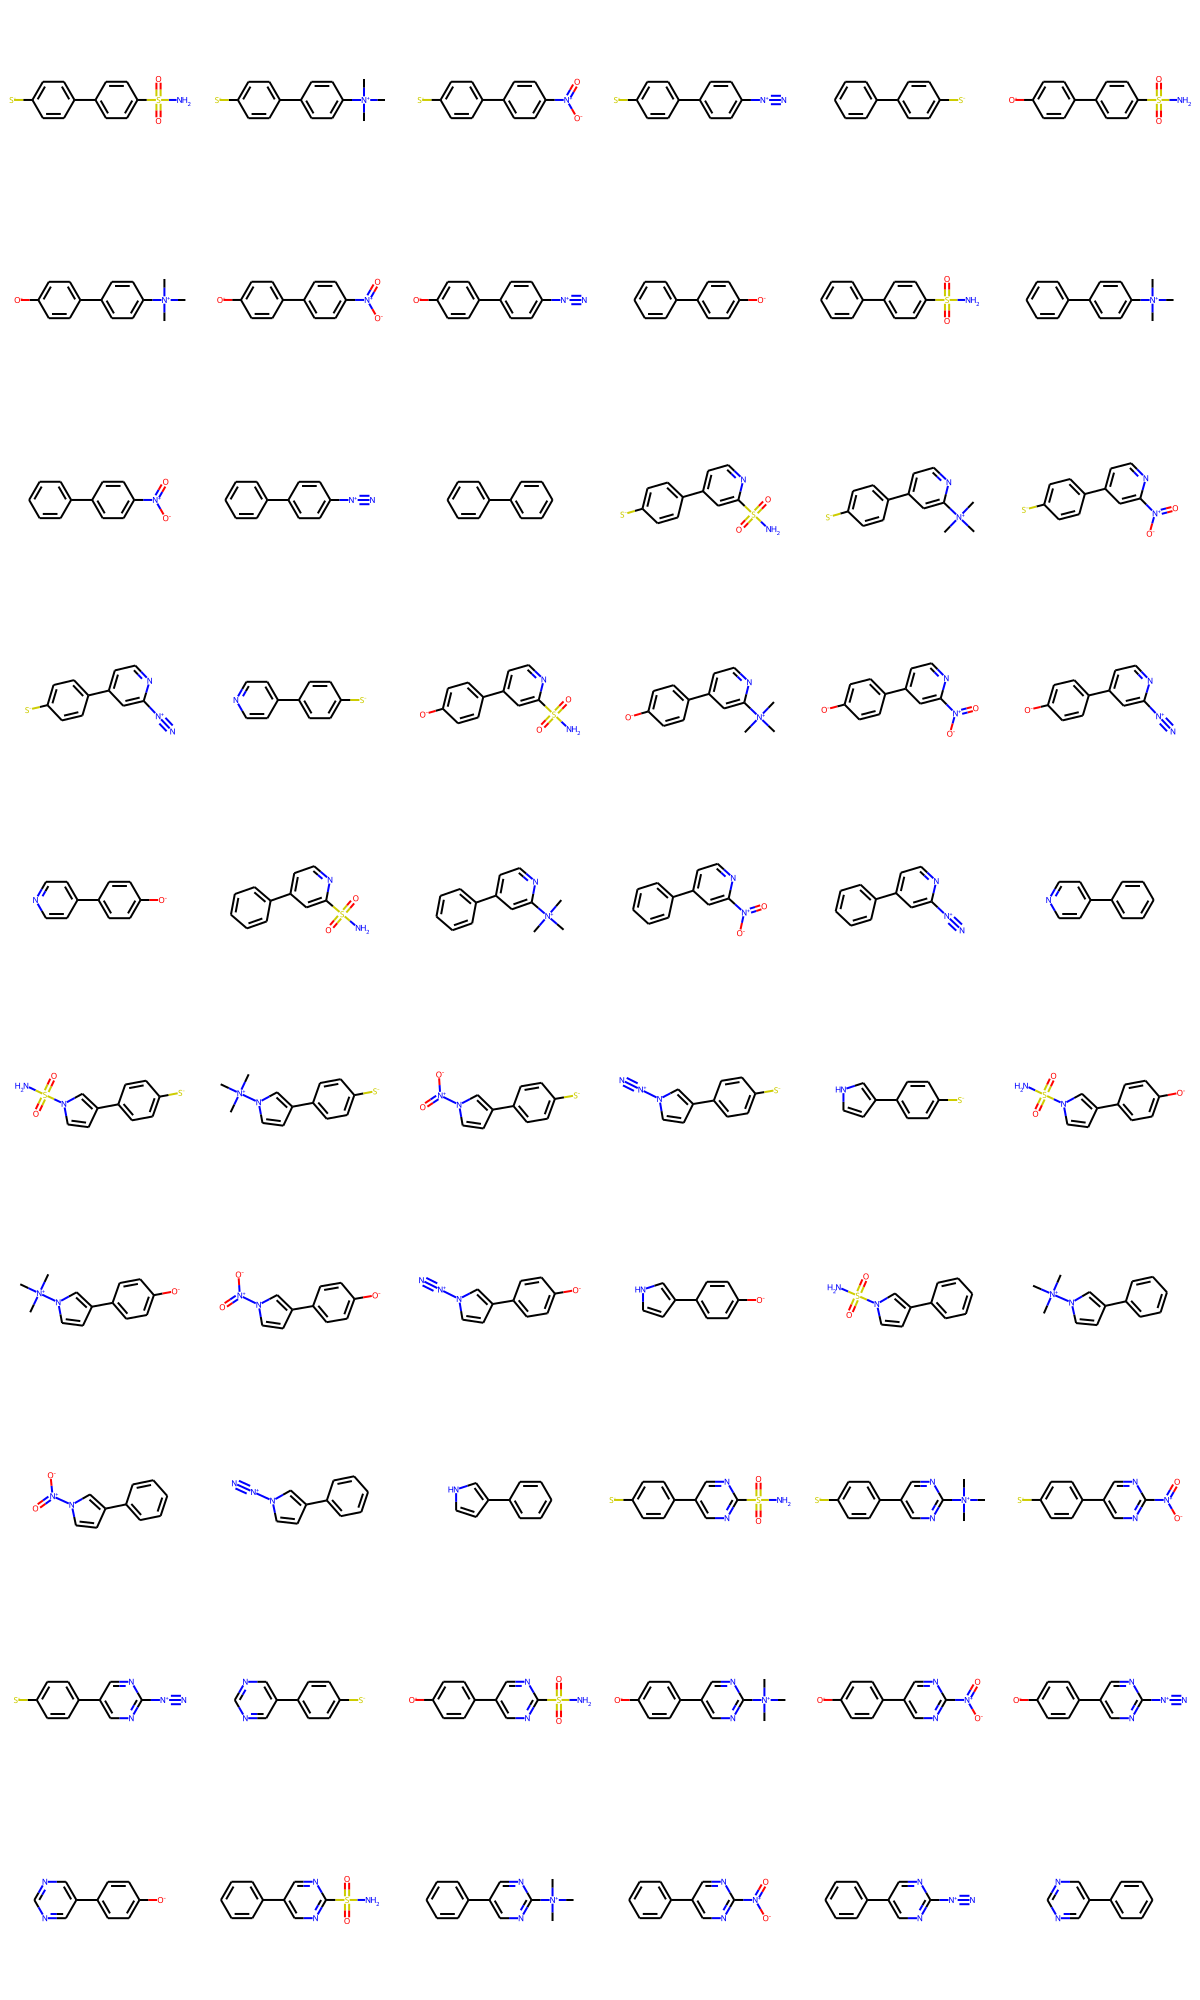

In [19]:
molecules = [MolFromSmiles(pattern) for pattern in smiles]
display(Draw.MolsToGridImage(molecules, maxMols=100, molsPerRow=6))

In [21]:
with open("biaryl_set.smi", "w") as file:
    file.write("\n".join(sorted(smiles)))